<Figure size 864x864 with 0 Axes>

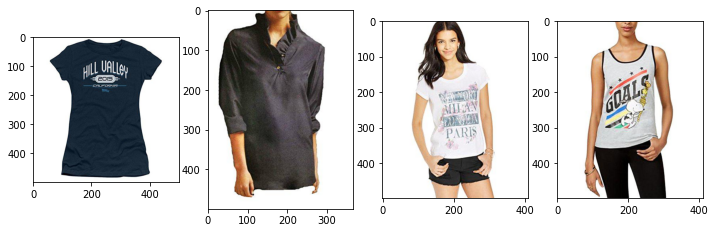

Do you want to continue shopping? (y/n)


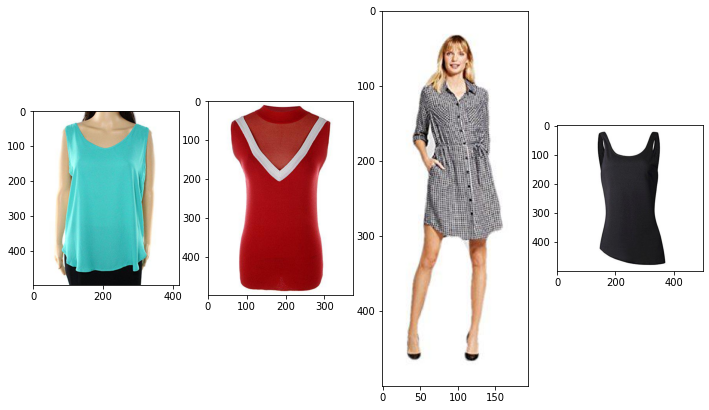

time taken: 1.2969582080841064
Do you want to continue shopping? (y/n)
 Program exiting due to invalid rating or upon user request
median time taken for 1 requests is 1.2969582080841064


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from efficientnet_pytorch import EfficientNet
import os 
import cv2 
import torch
import time



### window shopping simulation 

names = np.load('image_names.npy')
embeddings = np.load('embedings.npy')
folder_path = '16k_images'
n = len(names)
ind = np.random.randint(0,n,4)
avg_like_embds = [0]*1280
avg_dislike_embds = [0]*1280
to_be_removed = []
d=0
log_time = []

plt.figure(figsize=(12, 12))

while (True):

    plt.figure(figsize=(12, 12))
    c=1
    # show images corresponding to the indices ind 
    for x in ind:
        to_be_removed.append(x)
        plt.subplot(140+c)
        plt.imshow(plt.imread(os.path.join(folder_path, names[x])))
        c+=1
    plt.show()
    
    if(d>=1):
        end = time.time()
        log_time.append(end-start)
        print("time taken:",end-start)


    # ask user to give ratings for the images
    ratings = {}
    for i in ind:
        rating = int(input("give rating for image: " + names[i] + ": "))
        ratings[i] = rating

    print("Do you want to continue shopping? (y/n)")
    if(input()=='n'):
        print(" Program exiting due to invalid rating or upon user request")
        break

    # print(ratings.values())


    start = time.time()
    d+=1

    recent_like_embds = []
    recent_dislike_embds = []


    for i in ratings:
        if ratings[i] == 1:
            recent_like_embds.append(embeddings[i])
        if ratings[i] == -1: #or ratings[i] == 0:
            recent_dislike_embds.append(embeddings[i])
        if ratings[i] not in [1,-1,0]:
            exit_flag =1
            

    if len(recent_like_embds)==0:
        ind = np.random.randint(0,n,4)
        continue
 
    if len(recent_dislike_embds)==0:
        recent_dislike_embds.append([0]*1280)

    avg_like_embds = [i*0.3 for i in avg_like_embds] + 0.7* np.mean(np.array(recent_like_embds),axis=0)
    avg_dislike_embds = [i*0.3 for i in avg_dislike_embds] + 0.7* np.mean(np.array(recent_dislike_embds),axis=0)


    select_dict = {}

    for k in (set(range(n)) - set(to_be_removed)):
        #compute euclidean distance between the embeddings and the average embeddings
        dist_like = np.linalg.norm(avg_like_embds - embeddings[k])
        dist_dislike = np.linalg.norm(avg_dislike_embds - embeddings[k])
        # if dist_like < dist_dislike + 0.5:
        #     select_dict[k] = dist_like


        #take the cosine similarity of the embeddings with avg_like_embds and avg_dislike_embds
        cos_sim1 = np.dot(embeddings[i], avg_like_embds.T)
        cos_sim2 = np.dot(embeddings[i], avg_dislike_embds.T)

        if np.abs(cos_sim1) < np.abs(cos_sim2)+10  and dist_like < dist_dislike + 10:
            select_dict[k] = cos_sim1 + dist_like


    indices = sorted(select_dict.items(), key=lambda x: x[1])


    ind =[]
    if len(indices) >= 4:
        ind.extend([i[0] for i in indices[:4]])
    else:
        a = 4 - len(indices)
        ind.extend([j[0] for j in indices])

        l = np.random.randint(0,n,a)
        ind.extend(l)

# print median time taken to select 4 images
print(f"median time taken for {len(log_time)} requests is {np.median(log_time)}")